In [1]:
import sys
sys.path.append("..")

from utils import *

# Schatten en betrouwbaarheid

## Puntschattingen

In [4]:
def sample_mean(data):
    """Puntschatting van het populatiegemiddelde (mu) via steekproefgemiddelde."""
    return np.mean(data)

def sample_variance(data, ddof=1):
    """
    Puntschatting van de populatievariantie (σ²).
    ddof=1 voor steekproefvariantie (standaard).
    """
    return np.var(data, ddof=ddof)

def sample_std(data, ddof=1):
    return np.sqrt( sample_variance(data, ddof) )

def proportion_estimate(successes, num_trials):
    """
    Puntschatting van een populatieproportie (p̂).
    - Bij binaire data: successes = aantal successen, n = steekproefgrootte.
    - Bij array input: successes = lijst/array met 0/1 waarden.
    """
    if isinstance(successes, (list, np.ndarray, pd.Series)) and num_trials is None:
        successes = np.sum(successes)
        num_trials = len(successes)
    elif num_trials is None:
        raise ValueError("n is verplicht als je alleen het aantal successen geeft.")
    
    return successes / num_trials

## Betrouwbaarheidsintervallen

In [26]:
def confidence_interval_normal(sample_mean=0, sample_std=1, sigma=None, sample_size=100, alpha=0.05, width=8, height=5, filename="test_confidence_interval.png"):

    confidence_level = 1 - alpha
    confidence_percentage = int(100 * confidence_level)

    
    if sigma:
        z = norm.ppf(1-alpha/2)
        left = sample_mean - z * sigma / sqrt(sample_size)
        right = sample_mean + z * sigma / sqrt(sample_size)

        latex_code = f"""
            Omdat $\\sigma = {sigma}$ bekend is, kunnen we de normale verdeling gebruiken.
            De $z$-waarde die hoort bij $\\SI{{{confidence_percentage}}}{{\\percent}}$ betrouwbaarheid, oftewel $\\alpha = {alpha}$, is (in het geval van tweezijdige intervallen) gelijk aan
            \\[
                z_{{\\alpha/2}} = \\invnorm(\\text{{opp}}=1-\\frac{{\\alpha}}{{2}}) = \\invnorm(\\text{{opp}}={1-alpha/2}) \\approx {pretty_print(z)}.
            \\]
            Het \\SI{{{confidence_percentage}}}{{\\percent}}-betrouwbaarheidsinterval wordt dan gegeven door
            \\begin{{align*}}
                [\\overline{{x}} - z_{{\\alpha/2}} \\cdot \\frac{{ \\sigma }}{{ \\sqrt{{ n }} }}; \\overline{{x}} + z_{{\\alpha/2}} \\cdot \\frac{{ \\sigma }}{{ \\sqrt{{ n }} }}] \\\\
                &= [{pretty_print(sample_mean)} - {pretty_print(z)} \\cdot \\frac{{ {pretty_print(sigma)} }}{{ \\sqrt{{ {pretty_print(sample_size)} }} }}; {pretty_print(sample_mean)} + {pretty_print(z)} \\cdot \\frac{{ {pretty_print(sigma)} }}{{ \\sqrt{{ {pretty_print(sample_size)} }} }}] \\\\
                &= [{pretty_print(left)}; {pretty_print(right)}].
            \\end{{align*}}
        """
    else:
        if sample_size >= 30:
            z = norm.ppf(1-alpha/2)
            left = sample_mean - z * sample_std / sqrt(sample_size)
            right = sample_mean + z * sample_std / sqrt(sample_size)
    
            latex_code = f"""
                Hoewel $\\sigma$ onbekend is, kunnen we toch met de normale benadering werken omdat de steekproefgrootte $n = {sample_size} \\ge 30$ is.
                Hierbij mogen we de onbekende $\\sigma$ schatten met de steekproefstandaardafwijking $s$.
                De $z$-waarde die hoort bij \\SI{{{confidence_percentage}}}{{\\percent}} betrouwbaarheid, oftewel $\\alpha = {alpha}$, is (in het geval van tweezijdige intervallen) gelijk aan
                \\[
                    z_{{\\alpha/2}} = \\invnorm(\\text{{opp}}=1-\\frac{{\\alpha}}{{2}}) = \\invnorm(\\text{{opp}}={1-alpha/2}) \\approx {pretty_print(z)}.
                \\]
                Het \\SI{{{confidence_percentage}}}{{\\percent}}-betrouwbaarheidsinterval wordt dan gegeven door
                \\begin{{align*}}
                    [\\overline{{x}} - z_{{\\alpha/2}} \\cdot \\frac{{ s }}{{ \\sqrt{{ n }} }}; \\overline{{x}} + z_{{\\alpha/2}} \\cdot \\frac{{ s }}{{ \\sqrt{{ n }} }}] \\\\
                    &= [{pretty_print(sample_mean)} - {pretty_print(z)} \\cdot \\frac{{ {pretty_print(sample_std)} }}{{ \\sqrt{{ {pretty_print(sample_size)} }} }}; {pretty_print(sample_mean)} + {pretty_print(z)} \\cdot \\frac{{ {pretty_print(sample_std)} }}{{ \\sqrt{{ {pretty_print(sample_size)} }} }}] \\\\
                    &= [{pretty_print(left)}; {pretty_print(right)}].
                \\end{{align*}}
            """
        else:
            tval = t.ppf(1-alpha/2, df=sample_size-1)
            left = sample_mean - tval * sample_std / sqrt(sample_size)
            right = sample_mean + tval * sample_std / sqrt(sample_size)
    
            latex_code = f"""
                Omdat $\\sigma$ onbekend is en de steekproefgrootte $n = {sample_size} < 30$ is, moeten we gebruik maken van de $t$-verdeling.
                De $t$-waarde die hoort bij \\SI{{94}}{{\\percent}} betrouwbaarheid, oftewel $\\alpha = {alpha}$, is (in het geval van tweezijdige intervallen) gelijk aan
                \\[
                    t = \\invt(\\text{{opp}}=1-\\frac{{\\alpha}}{{2}}; \\text{{df}}=n-1) = \\invt(\\text{{opp}}={1-alpha/2}; \\text{{df}}={sample_size-1}) \\approx {pretty_print(tval)}.
                \\]
                Het \\SI{{{confidence_percentage}}}{{\\percent}}-betrouwbaarheidsinterval wordt dan gegeven door
                \\begin{{align*}}
                    [\\overline{{x}} - t \\cdot \\frac{{ s }}{{ \\sqrt{{ n }} }}; \\overline{{x}} + t \\cdot \\frac{{ s }}{{ \\sqrt{{ n }} }}] \\\\
                    &= [{pretty_print(sample_mean)} - {pretty_print(tval)} \\cdot \\frac{{ {pretty_print(sample_std)} }}{{ \\sqrt{{ {pretty_print(sample_size)} }} }}; {pretty_print(sample_mean)} + {pretty_print(tval)} \\cdot \\frac{{ {pretty_print(sample_std)} }}{{ \\sqrt{{ {pretty_print(sample_size)} }} }}] \\\\
                    &= [{pretty_print(left)}; {pretty_print(right)}].
                \\end{{align*}}
            """
    print(latex_code)

confidence_interval_normal(sample_mean=42.9231, sample_std=4.6451, sample_size=13, alpha=0.06)


                Omdat $\sigma$ onbekend is en de steekproefgrootte $n = 13 < 30$ is, moeten we gebruik maken van de $t$-verdeling.
                De $t$-waarde die hoort bij \SI{94}{\percent} betrouwbaarheid, oftewel $\alpha = 0.06$, is (in het geval van tweezijdige intervallen) gelijk aan
                \[
                    t = \invt(\text{opp}=1-\frac{\alpha}{2}; \text{df}=n-1) = \invt(\text{opp}=0.97; \text{df}=12) \approx 2.0764.
                \]
                Het \SI{94}{\percent}-betrouwbaarheidsinterval wordt dan gegeven door
                \begin{align*}
                    [\overline{x} - t \cdot \frac{ s }{ \sqrt{ n } }; \overline{x} + t \cdot \frac{ s }{ \sqrt{ n } }] \\
                    &= [42.9231 - 2.0764 \cdot \frac{ 4.6451 }{ \sqrt{ 13 } }; 42.9231 + 2.0764 \cdot \frac{ 4.6451 }{ \sqrt{ 13 } }] \\
                    &= [40.248; 45.5982].
                \end{align*}
            


### Minimale steekproefgrootte

In [8]:
def minimale_steekproefgrootte(sample_std=1, sigma=None, afwijking=1, alpha=0.05, width=8, height=5, filename="test_confidence_interval.png"):
    confidence_level = 1 - alpha
    confidence_percentage = int(100 * confidence_level)

    if sigma:
        z = norm.ppf(1-alpha/2)
        n = (z * sigma / afwijking) ** 2
        latex_code = f"""
            Omdat $\\sigma = {sigma}$ bekend is, kunnen we de normale verdeling gebruiken.
            De $z$-waarde die hoort bij \\SI{{{confidence_percentage}}}{{\\percent}} betrouwbaarheid, oftewel $\\alpha = {alpha}$, is (in het geval van tweezijdige intervallen) gelijk aan
            \\[
                z_{{\\alpha/2}} = \\invnorm(\\text{{opp}}=1-\\frac{{\\alpha}}{{2}}) = \\invnorm(\\text{{opp}}={1-alpha/2}) \\approx {pretty_print(z)}.
            \\]
            De minimale benodigde steekproefgrootte $n$ zodat het \\SI{{{confidence_percentage}}}{{\\percent}}-betrouwbaarheidsinterval maximaal $\\pm {afwijking}$ afwijkt is gelijk aan:
            \\begin{{align*}}
                n \\ge \\left( \\frac{{ z_{{\\alpha/2}} \\cdot \\sigma }}{{ a }} \\right)^2 = \\left( \\frac{{ {pretty_print(z)} \\cdot {pretty_print(sigma)} }}{{ {afwijking} }}\\right)^2 \\approx {pretty_print(n)}. 
            \\end{{align*}}

            Naar boven afronden geeft een minimale steekproefgrootte van $n = {int(ceil(n))}$.
        """
    else:
        if sample_size >= 30:
            z = norm.ppf(1-alpha/2)
            left = sample_mean - z * sample_std / sqrt(sample_size)
            right = sample_mean + z * sample_std / sqrt(sample_size)
    
            latex_code = f"""
                Hoewel $\\sigma$ onbekend is, kunnen we toch met de normale benadering werken omdat de steekproefgrootte $n = {sample_size} \\ge 30$ is.
                Hierbij mogen we de onbekende $\\sigma$ schatten met de steekproefstandaardafwijking $s$.
                De $z$-waarde die hoort bij \\SI{{{confidence_percentage}}}{{\\percent}} betrouwbaarheid, oftewel $\\alpha = {alpha}$, is (in het geval van tweezijdige intervallen) gelijk aan
                \\[
                    z_{{\\alpha/2}} = \\invnorm(\\text{{opp}}=1-\\frac{{\\alpha}}{{2}}) = \\invnorm(\\text{{opp}}={1-alpha/2}) \\approx {pretty_print(z)}.
                \\]
                Het \\SI{{{confidence_percentage}}}{{\\percent}}-betrouwbaarheidsinterval wordt dan gegeven door
                \\begin{{align*}}
                    [\\overline{{x}} - z_{{\\alpha/2}} \\cdot \\frac{{ s }}{{ \\sqrt{{ n }} }}; \\overline{{x}} + z_{{\\alpha/2}} \\cdot \\frac{{ s }}{{ \\sqrt{{ n }} }}] \\\\
                    &= [{pretty_print(sample_mean)} - {pretty_print(z)} \\cdot \\frac{{ {pretty_print(sample_std)} }}{{ \\sqrt{{ {pretty_print(sample_size)} }} }}; {pretty_print(sample_mean)} + {pretty_print(z)} \\cdot \\frac{{ {pretty_print(sample_std)} }}{{ \\sqrt{{ {pretty_print(sample_size)} }} }}] \\\\
                    &= [{pretty_print(left)}; {pretty_print(right)}].
                \\end{{align*}}
            """
        else:
            tval = t.ppf(1-alpha/2, df=sample_size-1)
            left = sample_mean - tval * sample_std / sqrt(sample_size)
            right = sample_mean + tval * sample_std / sqrt(sample_size)
    
            latex_code = f"""
                Omdat $\\sigma$ onbekend is en de steekproefgrootte $n = {sample_size} < 30$ is, moeten we gebruik maken van de $t$-verdeling.
                De $t$-waarde die hoort bij \\SI{{94}}{{\\percent}} betrouwbaarheid, oftewel $\\alpha = {alpha}$, is (in het geval van tweezijdige intervallen) gelijk aan
                \\[
                    t = \\invt(\\text{{opp}}=1-\\frac{{\\alpha}}{{2}}; \\text{{df}}=n-1) = \\invt(\\text{{opp}}={1-alpha/2}; \\text{{df}}={sample_size-1}) \\approx {pretty_print(tval)}.
                \\]
                Het \\SI{{{confidence_percentage}}}{{\\percent}}-betrouwbaarheidsinterval wordt dan gegeven door
                \\begin{{align*}}
                    [\\overline{{x}} - t \\cdot \\frac{{ s }}{{ \\sqrt{{ n }} }}; \\overline{{x}} + t \\cdot \\frac{{ s }}{{ \\sqrt{{ n }} }}] \\\\
                    &= [{pretty_print(sample_mean)} - {pretty_print(tval)} \\cdot \\frac{{ {pretty_print(sample_std)} }}{{ \\sqrt{{ {pretty_print(sample_size)} }} }}; {pretty_print(sample_mean)} + {pretty_print(tval)} \\cdot \\frac{{ {pretty_print(sample_std)} }}{{ \\sqrt{{ {pretty_print(sample_size)} }} }}] \\\\
                    &= [{pretty_print(left)}; {pretty_print(right)}].
                \\end{{align*}}
            """
    print(latex_code)

minimale_steekproefgrootte(sigma=0.4, afwijking=0.1, alpha=0.05)


            Omdat $\sigma = 0.4$ bekend is, kunnen we de normale verdeling gebruiken.
            De $z$-waarde die hoort bij \SI{95}{\percent} betrouwbaarheid, oftewel $\alpha = 0.05$, is (in het geval van tweezijdige intervallen) gelijk aan
            \[
                z_{\alpha/2} = \invnorm(\text{opp}=1-\frac{\alpha}{2}) = \invnorm(\text{opp}=0.975) \approx 1.96.
            \]
            De minimale benodigde steekproefgrootte $n$ zodat het \SI{95}{\percent}-betrouwbaarheidsinterval maximaal $\pm 0.1$ afwijkt is gelijk aan:
            \begin{align*}
                n \ge \left( \frac{ z_{\alpha/2} \cdot \sigma }{ a } \right)^2 = \left( \frac{ 1.96 \cdot 0.4 }{ 0.1 }\right)^2 \approx 61.4633. 
            \end{align*}

            Naar boven afronden geeft een minimale steekproefgrootte van $n = 62$.
        


## Voorspellingsintervallen

In [10]:
def prediction_interval_normal(mu=0, sigma=1, alpha=0.05, width=8, height=5, filename="test_prediction_interval.png"):
    variable_name = "Z" if mu == 0 and sigma == 1 else "X"

    xmin, xmax = mu - 4 * sigma, mu + 4 * sigma
    x = np.linspace(xmin, xmax, 1000)
    y = norm.pdf(x, mu, sigma)
    confidence_level = 1 - alpha
    confidence_percentage = int(100 * confidence_level)

    left = norm.ppf(alpha / 2, mu, sigma)
    right = norm.ppf(1 - alpha / 2, mu, sigma)
    
    # Plot characterization
    fig, ax = plt.subplots(figsize=(width, height))
    
    ax.plot(x, y, color=primary_plot_color)
    ax.fill_between(x, y, where=((x >= left)&(x<=right)), color=acceptable_color, alpha=opacity_level)
    ax.fill_between(x, y, where=((x <= left)|(x>=right)), color=critical_color, alpha=opacity_level)

    ymin, ymax = ax.get_ylim()
    ytext, offset = get_y_annotation(ax)
    ax.set_ylim(ymin - 2 * offset, ymax)

    ax.plot([left, left], [0, norm.pdf(left, mu, sigma)], color=primary_plot_color, linestyle='--', label = f"$g_1 \\approx {pretty_print(left)}$")
    ax.text(left, ytext, "$g_1$", color=primary_plot_color, ha="center", va="center")
    
    ax.plot([right, right], [0, norm.pdf(right, mu, sigma)], color=primary_plot_color, linestyle='--', label = f"$g_2 \\approx {pretty_print(right)}$")
    ax.text(right, ytext, "$g_2$", color=primary_plot_color, ha="center", va="center")

    ax.set_title(f'${confidence_percentage}\\%$-voorspellingsinterval voor ${variable_name} \\sim N(\\mu={mu}, \\sigma={sigma})$')
    # plt.title(f"Voorspellingsinterval: $[{left:.4f}; {right:.4f}]$")

    if variable_name == "Z":
        ax.set_xlabel('$z$')
        ax.set_ylabel('Standaardnormale kansdichtheidsdfunctie $f(z)$')
    else:
        ax.set_xlabel('$x$')
        ax.set_ylabel('Normale kansdichtheidsdfunctie $f(x)$')
    
    plt.legend()#loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    plt.tight_layout()

    # Save figure
    plt.savefig(filename)

### Voorbeeld gebruik

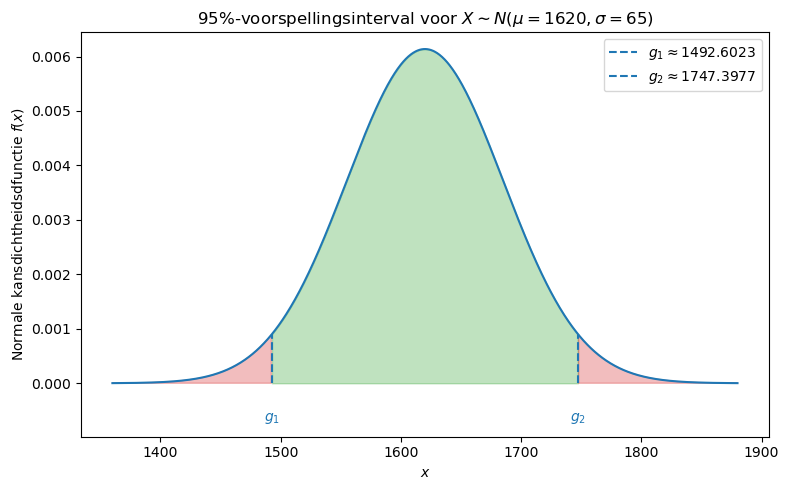

In [12]:
prediction_interval_normal(mu=1620, sigma=65, alpha=0.05, filename=FIGURE_PATH + "test_prediction_interval.png")

## LaTeX code generation

In [14]:
def latex_sample_mean(data):
    n = len(data)
    mean = pretty_print(sample_mean(data))
    latex_code = f"""
        We berekenen het steekproefgemiddelde $\\overline{{x}}$ als volgt:
        \\begin{{align*}}
            \\overline{{x}} = \\frac{{x_1+x_2+\\ldots+x_n}}{{n}} = \\frac{{ {data[0]} + {data[1]} + \\ldots + {data[-1]} }}{{ {n} }} \\approx {mean}.
        \\end{{align*}}
    """
    return latex_code

def latex_sample_variance(data, ddof=1):
    n = len(data)
    mean = pretty_print(sample_mean(data))
    var = pretty_print(sample_variance(data, ddof))
    latex_code = f"""
        We berekenen de steekproefvariantie $s^2$ als volgt:
        \\begin{{align*}}
            s^2 &= \\frac{{ (x_1 - \\overline{{x}})^2 + (x_2 - \\overline{{x}})^2 + \\ldots + (x_n - \\overline{{x}})^2 }}{{ n - {ddof} }} \\\\
                &= \\frac{{ ({data[0]} - {mean})^2 + ({data[1]} - {mean})^2 + \\ldots + ({data[-1]} - {mean})^2 }}{{ {n} - {ddof} }} \\\\
                &\\approx {var}.
        \\end{{align*}}
    """
    return latex_code

def latex_sample_std(data, ddof=1):
    n = len(data)
    var = pretty_print(sample_variance(data, ddof))
    std = pretty_print(sample_std(data, ddof))
    latex_code = f"""
        We berekenen de steekproefstandaardafwijking $s$ door te wortel van de steekproefvariantie $s^2$ te nemen:
        \\begin{{align*}}
            s = \\sqrt{{ s^2 }} = \\sqrt{{ {var} }} \\approx {std}.
        \\end{{align*}}
    """
    return latex_code

### Voorbeeld gebruik

In [16]:
data1 = [39, 42, 44, 48, 47, 43, 31, 46, 40, 42, 43, 49, 44] # Hartslag vrouwen
data2 = [42, 45, 47, 51, 50, 46, 34, 49, 43, 45, 46, 52, 47] # Hartslag mannen

for data in [data1, data2]:
    mean_code = latex_sample_mean(data)
    print(mean_code)
    
    var_code = latex_sample_variance(data)
    print(var_code)
    
    std_code = latex_sample_std(data)
    print(std_code)


        We berekenen het steekproefgemiddelde $\overline{x}$ als volgt:
        \begin{align*}
            \overline{x} = \frac{x_1+x_2+\ldots+x_n}{n} = \frac{ 39 + 42 + \ldots + 44 }{ 13 } \approx 42.9231.
        \end{align*}
    

        We berekenen de steekproefvariantie $s^2$ als volgt:
        \begin{align*}
            s^2 &= \frac{ (x_1 - \overline{x})^2 + (x_2 - \overline{x})^2 + \ldots + (x_n - \overline{x})^2 }{ n - 1 } \\
                &= \frac{ (39 - 42.9231)^2 + (42 - 42.9231)^2 + \ldots + (44 - 42.9231)^2 }{ 13 - 1 } \\
                &\approx 21.5769.
        \end{align*}
    

        We berekenen de steekproefstandaardafwijking $s$ door te wortel van de steekproefvariantie $s^2$ te nemen:
        \begin{align*}
            s = \sqrt{ s^2 } = \sqrt{ 21.5769 } \approx 4.6451.
        \end{align*}
    

        We berekenen het steekproefgemiddelde $\overline{x}$ als volgt:
        \begin{align*}
            \overline{x} = \frac{x_1+x_2+\ldots+x_n}{n} = \frac{ 42 +